# **Moments, Sorting, Approximating & Matching Contours**

**In this lesson we'll learn:**
1. Sort Contours by Area
2. Sort by Left to Right (Great for OCR) 
3. Approximate Contours 
4. Convex Hull

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(image = None, title="", size = 10):
    w, h = image.shape[0:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)



## **Finding Contours as per usual**

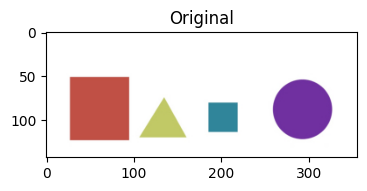

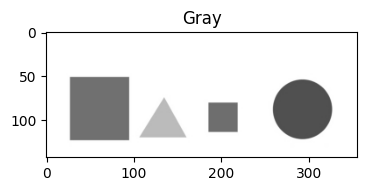

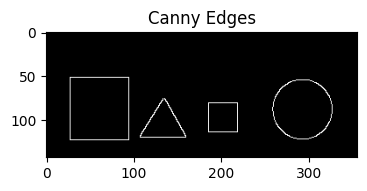

Number of contours found:  4


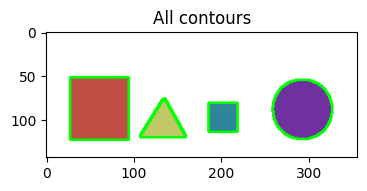

In [2]:
image= cv2.imread('images/geometric_shapes.jpg')
imshow(image, 'Original')

#gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray= cv2.imread('images/geometric_shapes.jpg', 0)
imshow(gray, 'Gray')

# Find Canny edges
edged= cv2.Canny(image, 50, 200)
imshow(edged, 'Canny Edges')
plt.show()

# Find contours and print how many were found
contours, hierarchy= cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Number of contours found: ',len(contours))

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow( image, 'All contours')

## **Sorting by Area using cv2.ContourArea and cv2.Moments**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/moments.png)

In [3]:
# Function we'll use to display contour area
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    
    all_areas=[]
    
    for contour in contours:
        area= cv2.contourArea(contour)
        all_areas.append(area)
        
    return all_areas

Contour Areas before sorting:
[1089.0, 51.0, 3616.5, 4757.0]
Contor Areas after sorting...
[4757.0, 3616.5, 1089.0, 51.0]


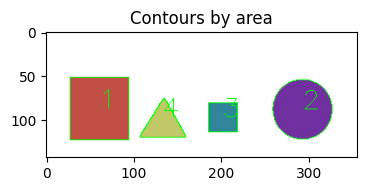

In [4]:
image= cv2.imread('images/geometric_shapes.jpg')

print('Contour Areas before sorting:')
print(get_contour_areas(contours))

# Sort contours large to small by area
sorted_contours= sorted(contours, key=cv2.contourArea, reverse=True)

print("Contor Areas after sorting...") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for i, c in enumerate(sorted_contours):
    M= cv2.moments(c)
    cx= int(M['m10'] / M['m00'])
    cy= int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1)
    cv2.drawContours(image, c, -1, (0,255,0), 1)
    
imshow(image, 'Contours by area')

In [5]:
len(contours)

4

In [6]:
contours[0].shape

(132, 1, 2)

In [7]:
len(cv2.moments(contours[0])), cv2.moments(contours[0])

(24,
 {'m00': 1089.0,
  'm10': 219433.5,
  'm01': 106177.5,
  'm20': 44314677.0,
  'm11': 21394766.25,
  'm02': 10451133.0,
  'm30': 8969234595.75,
  'm21': 4320681007.5,
  'm12': 2105903299.5,
  'm03': 1038256683.75,
  'mu20': 98826.75,
  'mu11': 0.0,
  'mu02': 98826.75,
  'mu30': 0.0,
  'mu21': 0.0,
  'mu12': 0.0,
  'mu03': 0.0,
  'nu20': 0.08333333333333333,
  'nu11': 0.0,
  'nu02': 0.08333333333333333,
  'nu30': 0.0,
  'nu21': 0.0,
  'nu12': 0.0,
  'nu03': 0.0})

**Define some functions we'll be using**

In [8]:
# Functions we'll use for sorting by position
def x_cord_contour(contour):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contour) > 10:
        M= cv2.moments(contour)
        return int(M['m10'] / M['m00'])
    else:
        pass
    
def label_contour_center(image, contour):
    """Places a red circle on the centers of contours"""
    M= cv2.moments(contour)
    cx= int(M['m10'] / M['m00'])
    cy= int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image, (cx,cy), 5, (0,0,255), -1)
    return image

In [9]:
cv2.contourArea(contours[0])

1089.0

**We use Moments to Calculate the Center and then use the X Cordinate to sort from left to right**

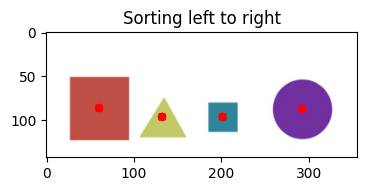

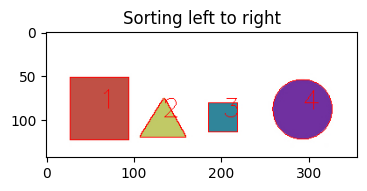

In [10]:
# Load our image
image= cv2.imread('images/geometric_shapes.jpg')
original_image= image.copy()

# Compute Center of Mass or centroids and draw them on our image
for i, contour in enumerate(contours):
    orig= label_contour_center(image, contour)
    
# Showing the Contour centers
imshow(image, 'Sorting left to right')

# Sort by left to right using our x_cord_contour function
contours_left_to_right= sorted(contours, key=x_cord_contour, reverse=False)

# Labeling Contours left to right
for i, contour in enumerate(contours_left_to_right):
    cv2.drawContours(original_image, contour, -1, (0,0,255), 1)
    
    M= cv2.moments(contour)
    cx= int(M['m10'] / M['m00'])
    cy= int(M['m01'] / M['m00'])
    cv2.putText(original_image, str(i+1), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 1)
    x,y,w,h= cv2.boundingRect(contour)
    
imshow(original_image, 'Sorting left to right')

In [11]:
x,y,w,h

(258, 55, 69, 68)

## **Approximating Contours using ApproxPolyDP**

Using `ApproxPolyDP` to approximate contours as a more defined shape

It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.


`cv2.approxPolyDP(contour, Approximation Accuracy, Closed)`
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


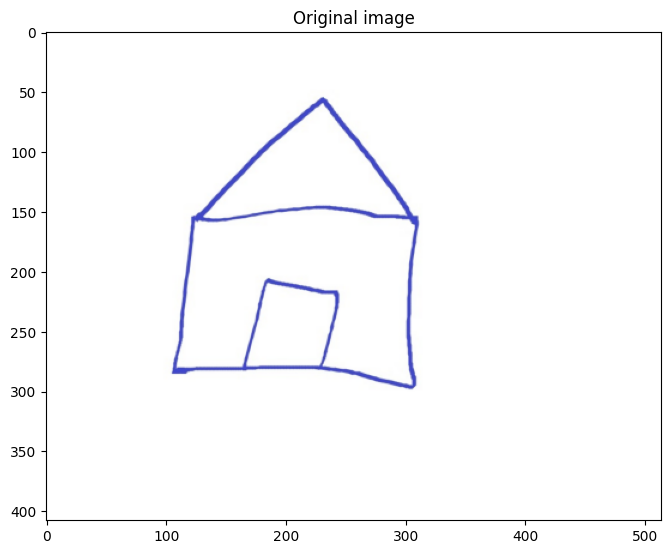

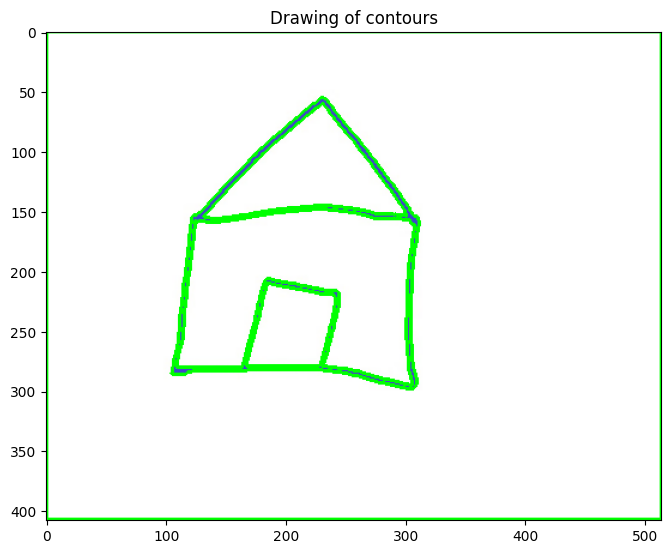

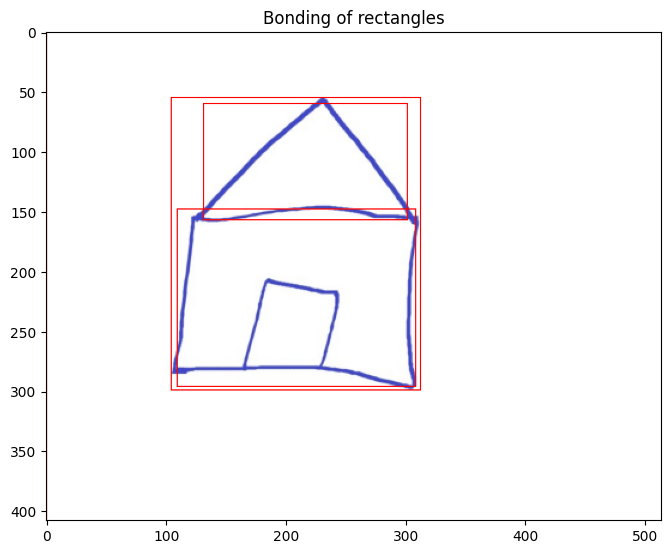

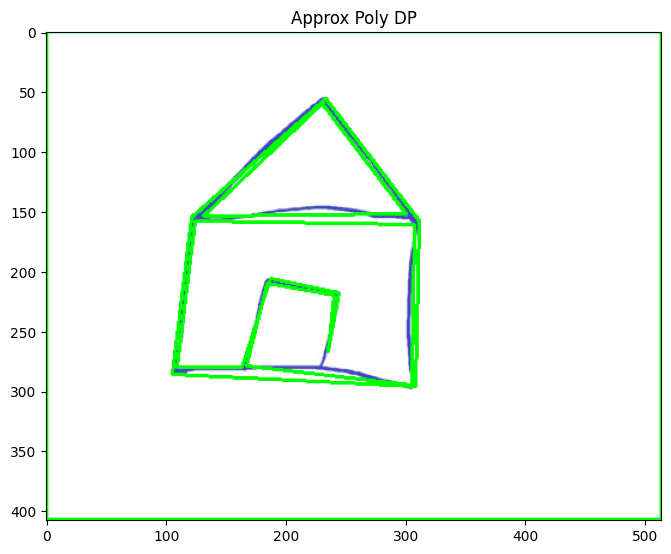

In [12]:
# Load image and keep a copy
image= cv2.imread('images/house.png')
original_image= image.copy()
original_image_2= image.copy()
imshow(image, 'Original image')

# Grayscale and binarize
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imshow(gray, 'Gray')
_,thresh= cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#imshow(thresh, 'Threshold')

# Find contours 
contours, hierarchy= cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour 
for contour in contours:
    x,y,w,h= cv2.boundingRect(contour)
    cv2.drawContours(image, contour, -1, (0,255,0), 2)
    cv2.rectangle(original_image, (x,y), (x+w, y+h), (0,0,255), 1)

imshow(image, 'Drawing of contours')
imshow(original_image, 'Bonding of rectangles')

# Iterate through each contour and compute the approx contour
for contour in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy=  cv2.arcLength(contour, True) * 0.03
    approx= cv2.approxPolyDP(contour, accuracy, True)
    cv2.drawContours(original_image_2, [approx], 0, (0,255,0), 2)
    
imshow(original_image_2, 'Approx Poly DP')

In [13]:
contour.shape

(1840, 1, 2)

In [14]:
contour.shape[0]

1840

In [15]:
cv2.arcLength(contour, True)

1840.0

In [16]:
1840 * 0.03

55.199999999999996

In [17]:
accuracy

55.199999999999996

In [18]:
approx= cv2.approxPolyDP(contour, accuracy, True)
approx.shape, approx

((4, 1, 2),
 array([[[  0,   0]],
 
        [[  0, 407]],
 
        [[513, 407]],
 
        [[513,   0]]], dtype=int32))

## **Convex Hull**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/convex.png)

Convex Hull will look similar to contour approximation, but it is not (Both may provide the same results in some cases). 

The `cv2.convexHull()` function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours

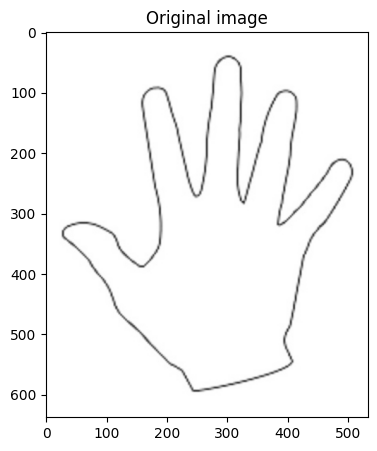

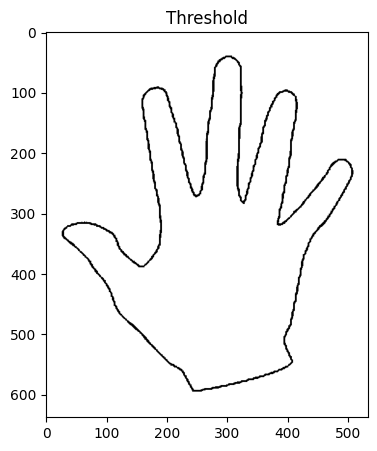

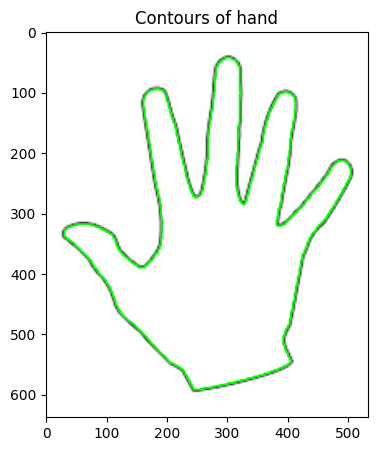

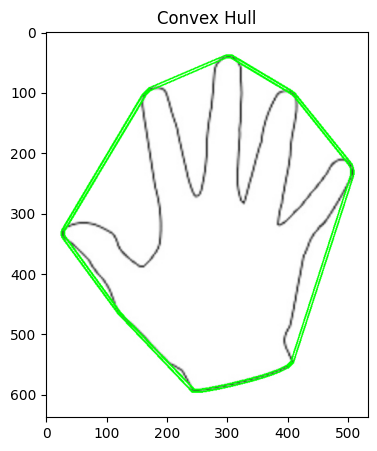

In [19]:
# Load image and convert it to gray
image= cv2.imread('images/hand.jpg')
original_image= image.copy()
imshow(image, 'Original image', 5)

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imshow(gray, 'Gray', 5)

# Threshold the image
_,thresh= cv2.threshold(gray, 170, 255, 0)
imshow(thresh, 'Threshold', 5)

# Find contours 
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, 0, (0,255,0), 2)
imshow(image, 'Contours of hand', 5)

# Sort Contors by area and then remove the largest frame contour
n= len(contours)-1
contours= sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for contour in contours:
    hull= cv2.convexHull(contour)
    cv2.drawContours(original_image, [hull], 0, (0,255,0), 2)
    
imshow(original_image, 'Convex Hull', 5)

In [20]:
image.shape, gray.shape, (len(thresh), len(thresh[0]))

((638, 533, 3), (638, 533), (638, 533))

In [21]:
len(contours), contours[0].shape

(2, (2512, 1, 2))

In [22]:
contours[0].shape

(2512, 1, 2)

In [23]:
hull.shape, hull

((35, 1, 2),
 array([[[297,  38]],
 
        [[307,  38]],
 
        [[406,  97]],
 
        [[411, 101]],
 
        [[412, 102]],
 
        [[506, 219]],
 
        [[508, 225]],
 
        [[509, 229]],
 
        [[509, 235]],
 
        [[508, 239]],
 
        [[409, 547]],
 
        [[400, 556]],
 
        [[390, 561]],
 
        [[383, 564]],
 
        [[375, 567]],
 
        [[360, 572]],
 
        [[350, 575]],
 
        [[343, 577]],
 
        [[332, 580]],
 
        [[320, 583]],
 
        [[299, 588]],
 
        [[285, 591]],
 
        [[274, 593]],
 
        [[257, 596]],
 
        [[242, 596]],
 
        [[241, 595]],
 
        [[119, 466]],
 
        [[ 28, 342]],
 
        [[ 26, 339]],
 
        [[ 25, 337]],
 
        [[ 25, 330]],
 
        [[ 26, 328]],
 
        [[159, 104]],
 
        [[171,  92]],
 
        [[173,  91]]], dtype=int32))

# **Matching Contours**
`cv2.matchShapes(contour template, contour, method, method parameter)`

Output : match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)


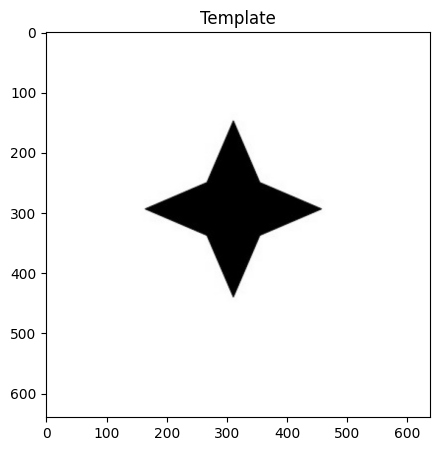

0.13118942605152828
0.15944456507187488
0.06494067014090346
0.15016879048029189


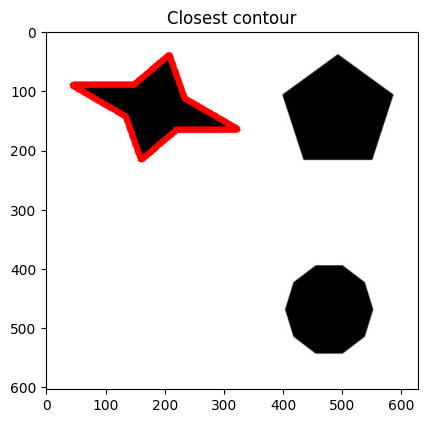

In [72]:
# Load the shape template or reference image
template= cv2.imread('images/star.jpg')
template_gray= cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
imshow(template, 'Template', 5)
plt.show()

# Load the target image with the shapes we're trying to match
target= cv2.imread('images/shapes_to_match.jpg')
target_gray= cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
_,thresh1= cv2.threshold(template_gray, 127, 255, 0)
_,thresh2= cv2.threshold(target_gray, 127, 255, 0)
#imshow(thresh1, 'Thresh1', 5 )
#imshow(thresh2, "Thresh 2", 5)

# Find contours in template
contours_1, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours= sorted(contours_1, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour= contours_1[1]

# Extract contours from second target image
contours_2, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour in the target image and use cv2.matchShapes to compare contour shapes
for c in contours_2:
    match= cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    
    # If the match value is less than 0.15 we
    if match < 0.15:
        #print('Closest match: ', match)
        closest_contour= c
    else:
        pass

#closest_contour= contours_2[2]
#print('Closest contour:\n', closest_contour)
cv2.drawContours(target, closest_contour, -1, (0,0,255), 10)
imshow(target, 'Closest contour', 5)

In [20]:
target_gray.shape

(604, 629)

In [21]:
len(contours_1)

2

In [22]:
template_contour.shape

(516, 1, 2)

In [23]:
contours_1[0].shape, contours_1[1].shape

((4, 1, 2), (516, 1, 2))

In [24]:
len(contours_2)

4

In [25]:
contours_2[0].shape, contours_2[1].shape, contours_2[2].shape, contours_2[3].shape

((4, 1, 2), (190, 1, 2), (291, 1, 2), (256, 1, 2))

In [66]:
closest_contour

[]

In [41]:
type(match), match

(float, 0.15016879048029189)

In [42]:
match= 0.06494067014090346


if match < 0.15:
    closest_contour= 1
else:
    closest_contour= 0
    
closest_contour

1